In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 直方图


In [9]:
img= cv2.imread('cat.jpg')

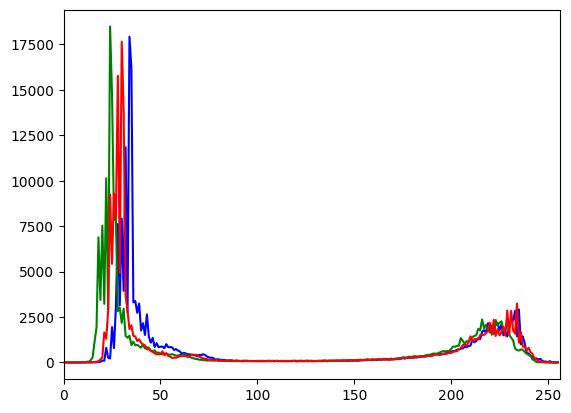

In [10]:
color= ["b","g","r"]
for i, col in enumerate(color):
    histr= cv2.calcHist([img],[i],None,[256],[0,256]) # 注意参数都要放进中括号. None表示不使用mask选择范围
    plt.plot(histr,color=col)
    plt.xlim([0,256])
